# Preparing The Required Libraries

In [2]:
%pylab inline
import pandas
import seaborn
import pandas_profiling
import numpy
import matplotlib
import geopandas
import fiona
import shapely
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']= (50,50)

Populating the interactive namespace from numpy and matplotlib


# Analyzing The Datas

 Data Set Chosen: 

-> Airbnb Sydney Database 



 Data Set Chosen: 

 -> Insiderairbnb [ No Bias since or politcal since it's an Airbnb]



 Description Of Dataset

 -> This dataset covers a variety of things ranging from host names to neighbourhood as well as price and other important figures.

# 1. Preparing and getting data ready for analysis

In [48]:
mapdata = geopandas.read_file('NSW_LOCALITY_POLYGON_shp.shp')

In [4]:
data = pandas.read_csv('Desktop/listings.csv')

In [5]:
pandas_profiling.ProfileReport(data)

C:\Users\Hugo\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,16
Number of observations,38080
Total Missing (%),9.8%
Total size in memory,4.6 MiB
Average record size in memory,128.0 B
Numeric,10
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,1


# Categorising The Data And Generalising The Charts

In [6]:
data.drop(['availability_365', 'minimum_nights', 'neighbourhood', 'room_type'],axis=1).head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,11156,An Oasis in the City,40855,Colleen,NaN,-33.86917,151.22656,65,185,2019-04-24,1.58,1
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,-33.86515,151.19190,14316,516,2019-06-29,4.73,2
2,14250,Manly Harbour House,55948,Heidi,NaN,-33.80093,151.26172,470,2,2019-01-02,0.05,2
3,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,-33.88045,151.21654,110,323,2019-05-23,3.60,3
4,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,-33.85907,151.17275,450,16,2019-01-03,0.17,1


# Lets make some easy charts to understand and get to know our surroundings of what we are understanding 

Content Includes:
    1. Listings In Different Suburbs
    2. Pie Chart Of Different Room Types
    3. Common Room Types [ Bar Chart ]
    4. Airbnb prices around different suburbs

# How Many Listings Are There For Airbnb In Different Suburbs?

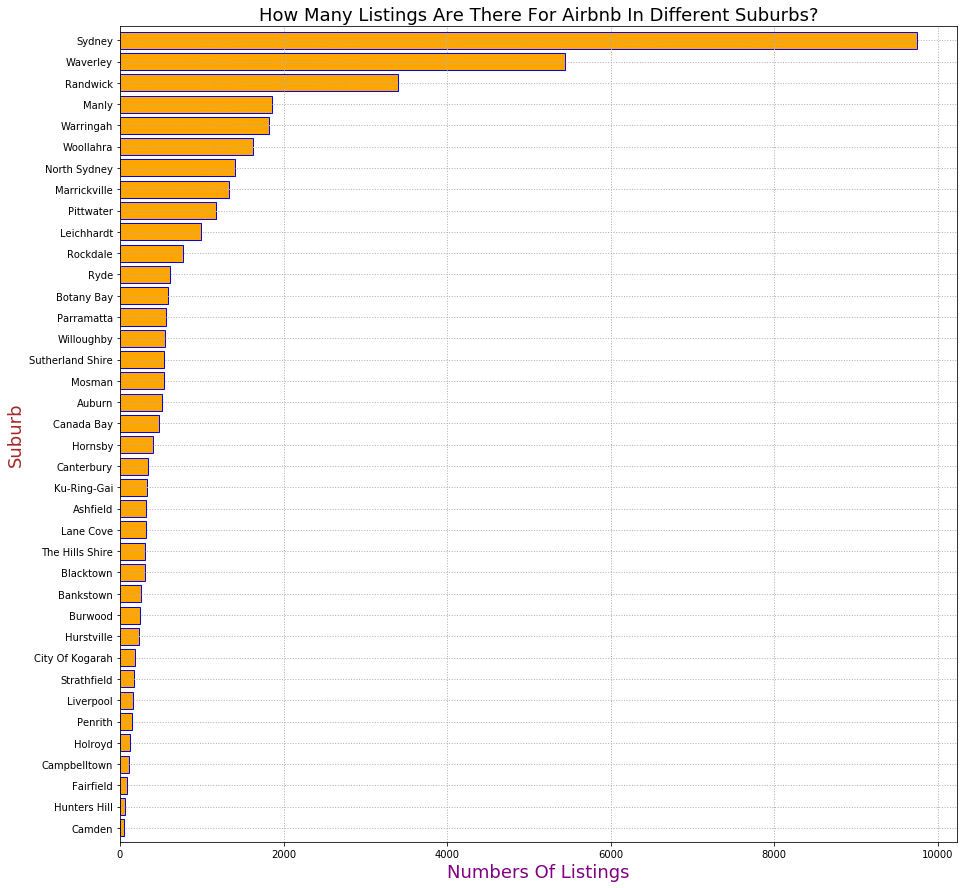

In [56]:
pandas.value_counts(data['neighbourhood']).plot(kind='barh', color = 'orange', width=0.8,figsize=(15,15),edgecolor='blue').invert_yaxis()
plt.title('How Many Listings Are There For Airbnb In Different Suburbs?',size = 18, color = 'black')
plt.ylabel('Suburb', color = 'brown',size=18)
plt.xlabel('Numbers Of Listings', color = 'purple',size=18)
plt.grid(linestyle=':', linewidth=1)
plt.show()

# What are the most common room type Airbnb offers?

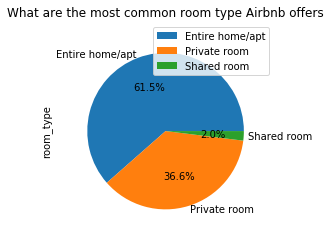

In [55]:
pandas.value_counts(data['room_type']).plot(kind='pie', radius=0.9, labeldistance=1.05, autopct='%1.1f%%', legend = 1)
plt.title('What are the most common room type Airbnb offers', color = 'black')
plt.show()

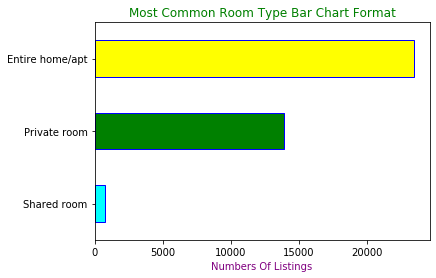

In [57]:
pandas.value_counts(data['room_type']).plot(kind='barh',color=['yellow', 'green', 'cyan'], edgecolor='blue').invert_yaxis()
plt.title('Most Common Room Type Bar Chart Format', color = 'g')
plt.xlabel('Numbers Of Listings', color = 'purple')
plt.show()

# What's the most Minimum Nights that are required for a booking? [ Not Working D:]

In [9]:
data['minimum_nights'] > 7
filtered_data = data['minimum_nights'][data['minimum_nights'] > 7]

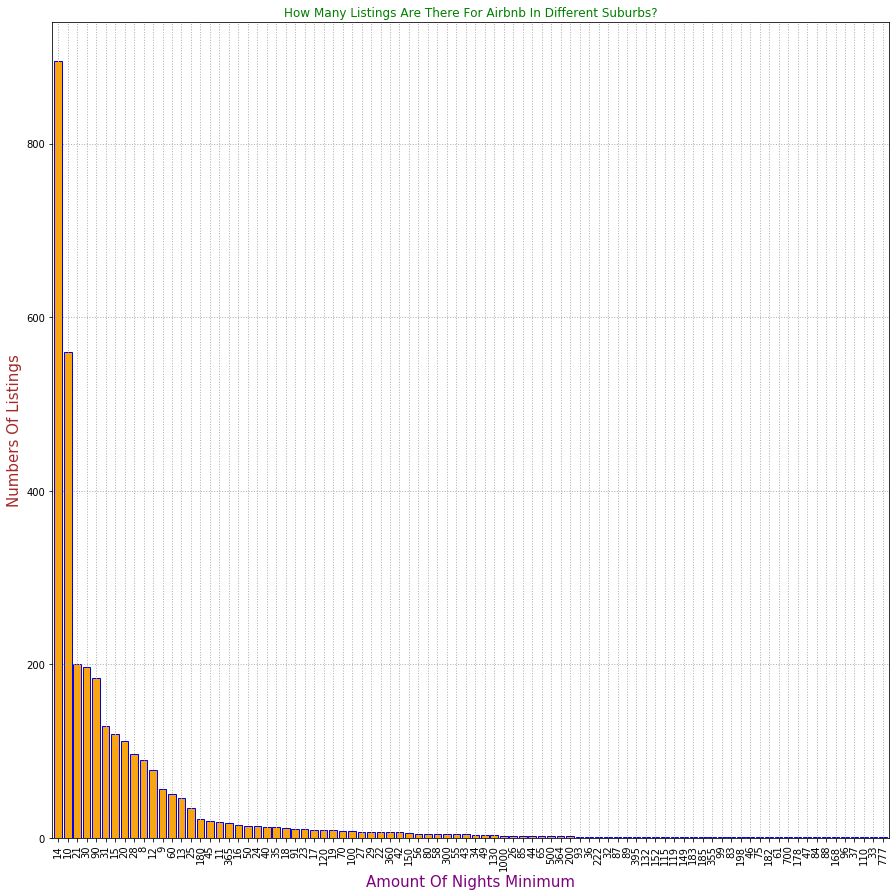

In [11]:
pandas.value_counts(filtered_data).plot(kind='bar', color = 'orange', width=0.8,figsize=(15,15),edgecolor='blue')
plt.title('How Many Listings Are There For Airbnb In Different Suburbs?', color = 'g')
plt.ylabel('Numbers Of Listings', color = 'brown',size=15)
plt.xlabel('Amount Of Nights Minimum', color = 'purple',size=15)
plt.grid(linestyle=':', linewidth=1)
plt.show()

''

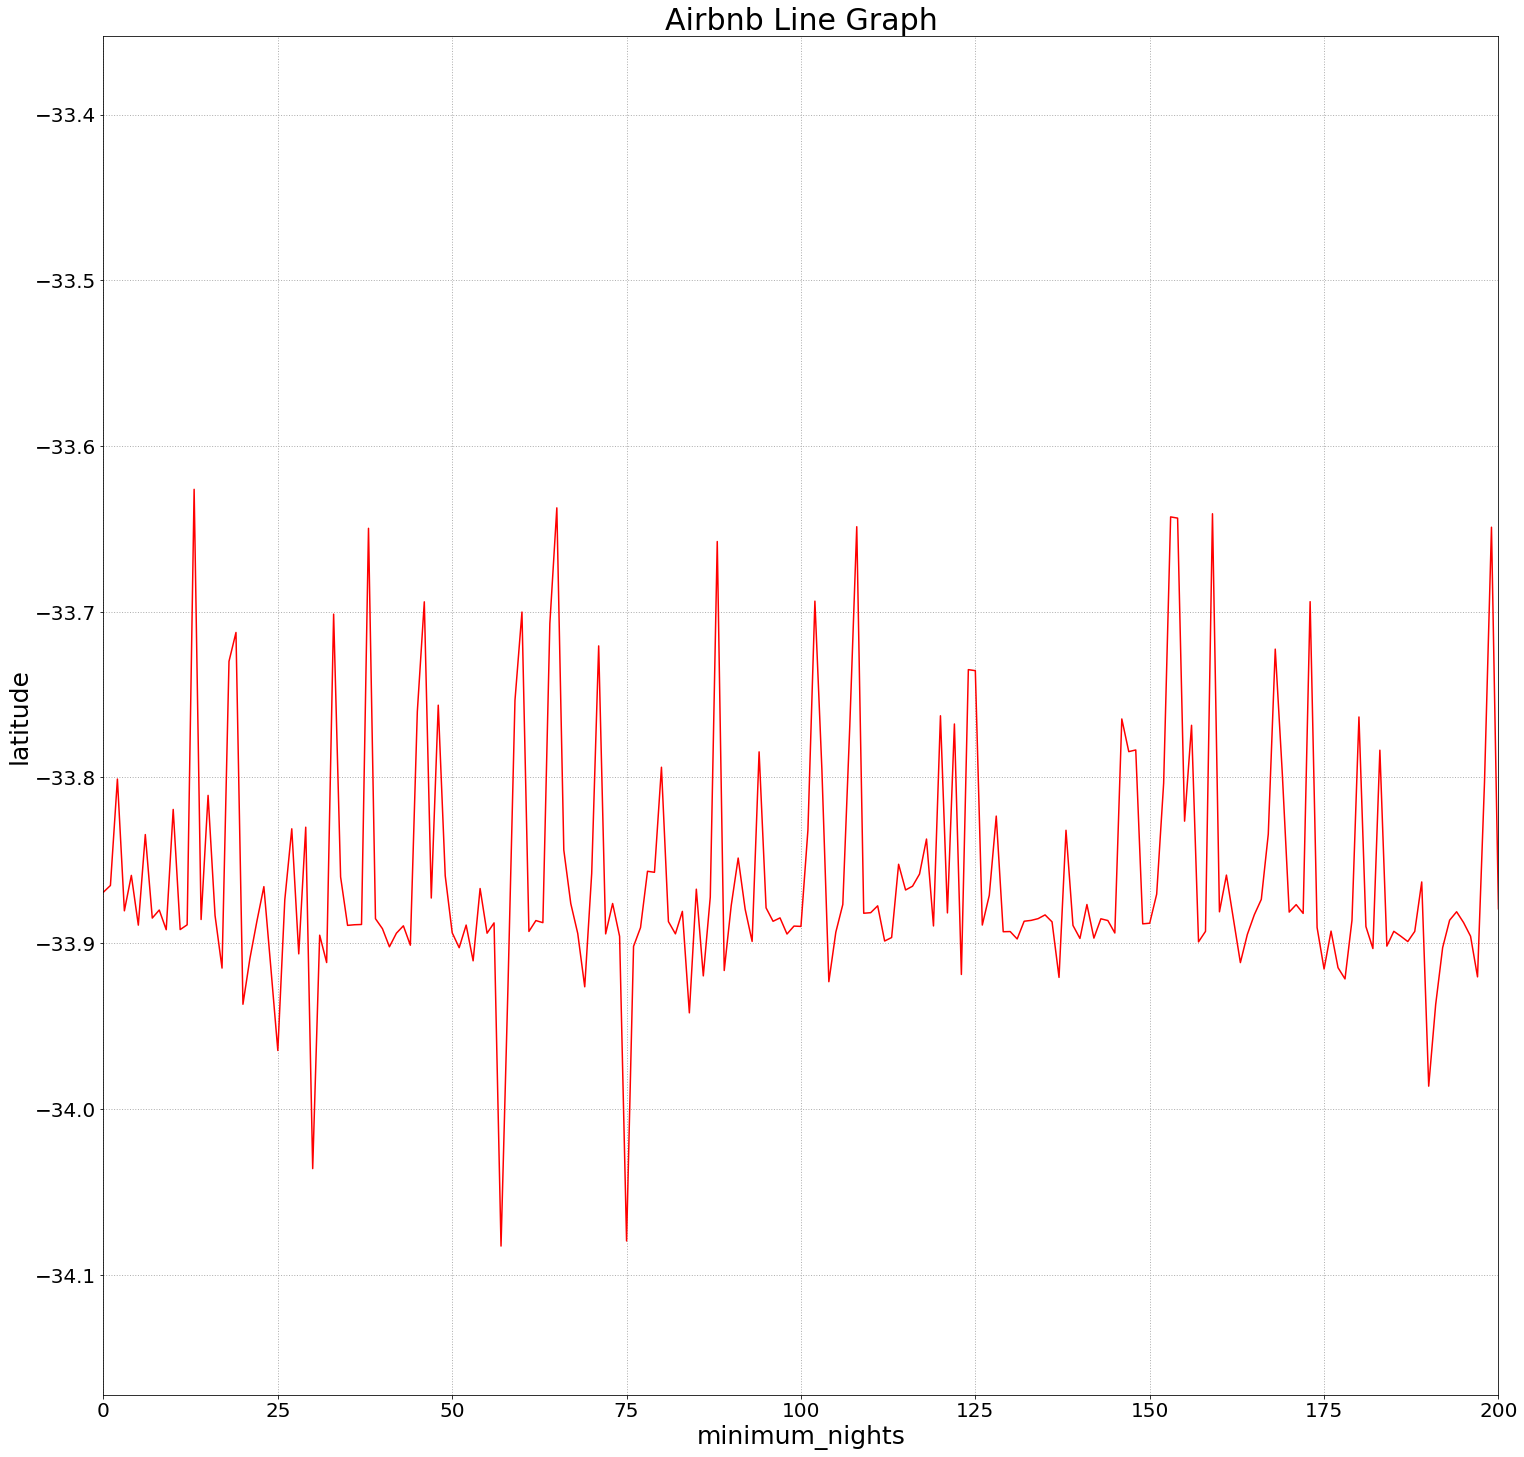

In [12]:
figure(figsize=(25,25))
plot(data['latitude'], color = "Red")
xlim(0,200)
xlabel('minimum_nights', size = 25)
ylabel('latitude', size = 25)
xticks(size = 20)
yticks(size = 20)
title('Airbnb Line Graph', size = 30)
plt.grid(linestyle=':', linewidth=1)
;

# Now let's focus onto the locations of these Airbnb hostings across Sydney

  When looking at locations of Airbnb Hostings, we will be visualizing the different locations of the listings onto a map making it easier for readers to understand. 

# Histogram Of The Latitude + Longitude

''

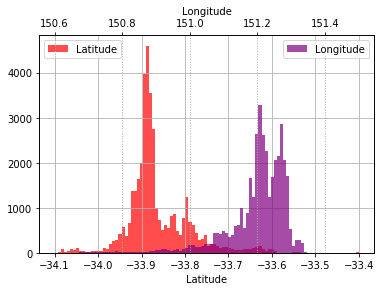

In [13]:
hist(data['latitude'], bins = 100, range = (-34.1, -33.4), rwidth = 1, alpha = .7, color = "Red", label = 'Latitude')
xlabel("Latitude")
grid()
legend(loc="upper left")
twiny()
hist(data['longitude'], bins = 100, range = (150.6, 151.5), rwidth = 1, alpha = .7, color = "Purple", label = 'Longitude')
xlabel("Longitude")
grid()
legend(loc="upper right")
plt.grid(linestyle=':', linewidth=1)
;

# A Simple Map Of All Listings Jumbled Together 

As you can see on the graph, the listings is usually gathered inside of the CBD where most Airbnb hostings are listed. 
But this does not really tell us everything about the hosting. So let's dig deeper and go more in-depth. We will be able to explore deeper by exploring each room types and checking them individually on the map which will tell us more.

Text(0.5, 0, 'Longitude')

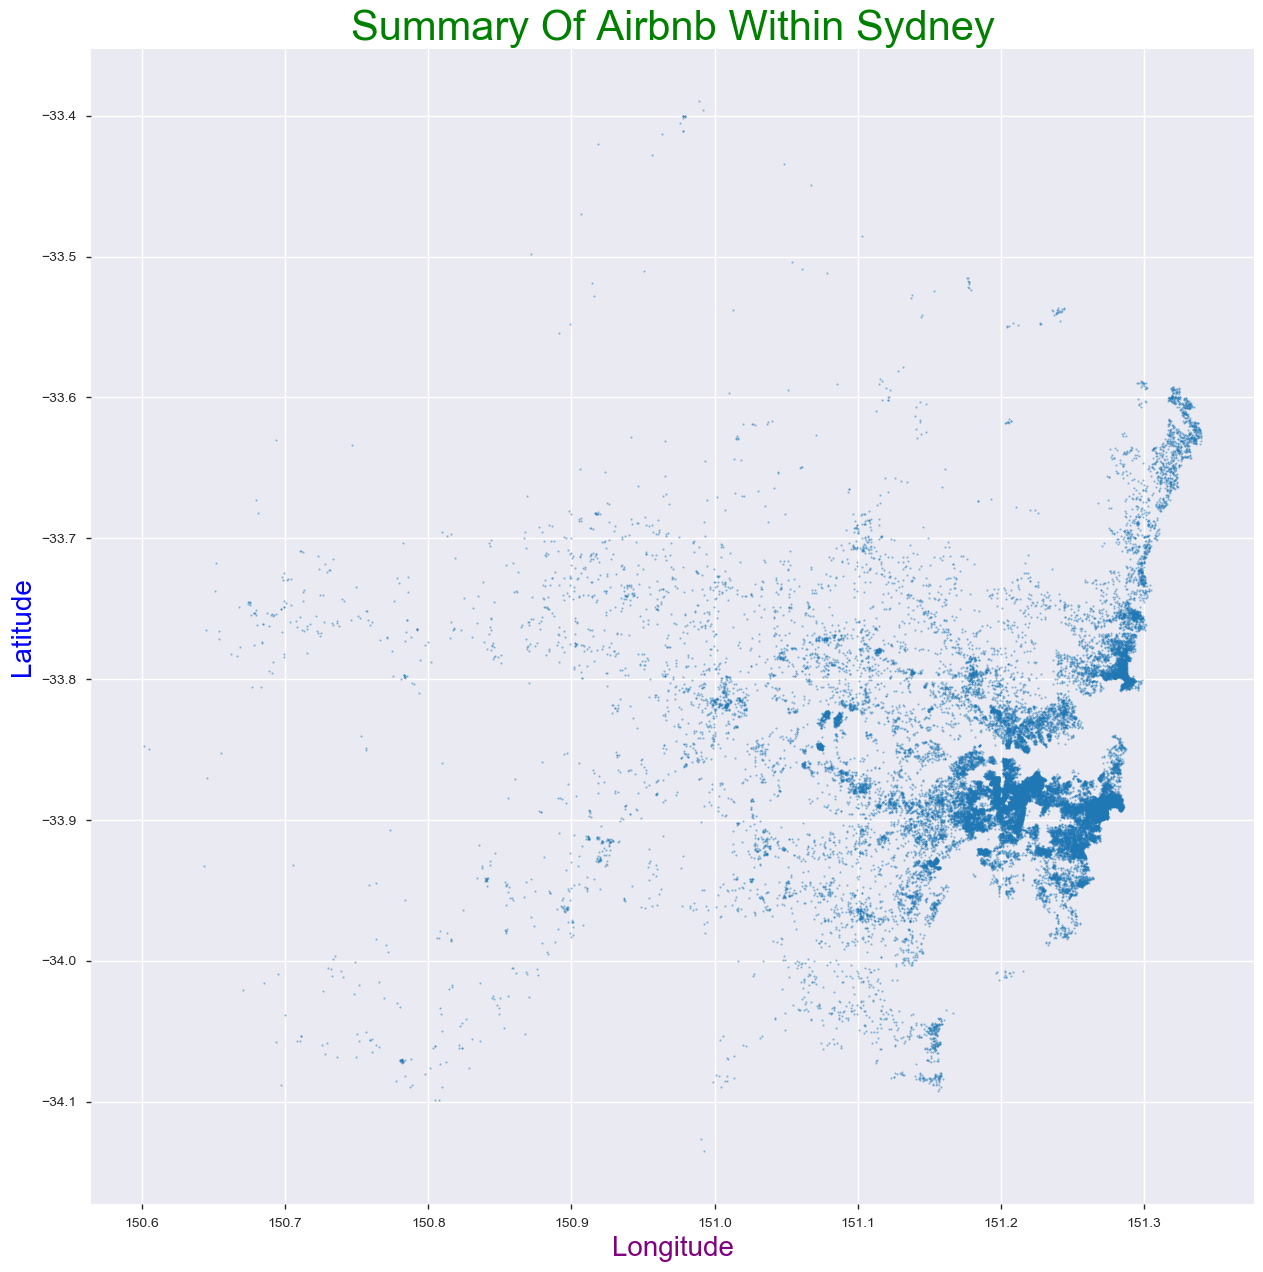

In [13]:
figure(figsize=(15,15))
plot((data['longitude']), data['latitude'], '.',ms=3, alpha=.5)
plt.title('Summary Of Airbnb Within Sydney', color = 'green',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)

#Aparrtment show red House color other 

# Using for loop to seperate and sort out each room type for future usage

In [64]:
list = []
for type in data['room_type']:
    if type >= str("Private Room"):
        list.append(True)
    else:
        list.append(False)

In [65]:
privateapt = pandas.Series(list)
privateapt.head()

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [66]:
list2 = []
for type in data['room_type']:
    if type >= str("Shared Room"):
        list2.append(True)
    else:
        list2.append(False)

In [67]:
shared = pandas.Series(list2)

In [68]:
list3 = []
for type in data['room_type']:
    if type == str("Entire home/apt"):
        list3.append(True)
    else:
        list3.append(False)

In [69]:
entire = pandas.Series(list3)

# Map Showing Each Room Types On The Map

                                    Green stands for Private Apartments
                                    
                                    Purple stands for Shared Room
                                    
                                    Red stands for Entire Apt / House
                                    
                                    

By seperating these 3 room types, we acknowledge that shared rooms and apartments are the most common within the Sydney CBD. Furthermore, we also see that shared room are less common as understood from above that shared room tend to be less popular amongst people as "no one likes to share a room with a stranger". But if we look deeper, we can see that there are alot of entire apartments and houses in the upper bit of Sydney which presumably would be the Central Coast area, this is because that area is much more open and filled with empty lands and bigger houses. With this data in hand, we will soon explore the prices as well and compare how they match up against each other in different region of NSW / Sydney.

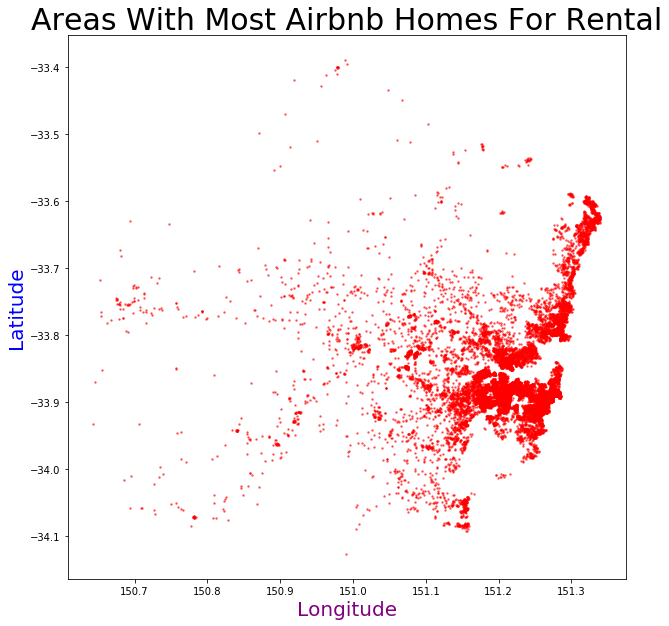

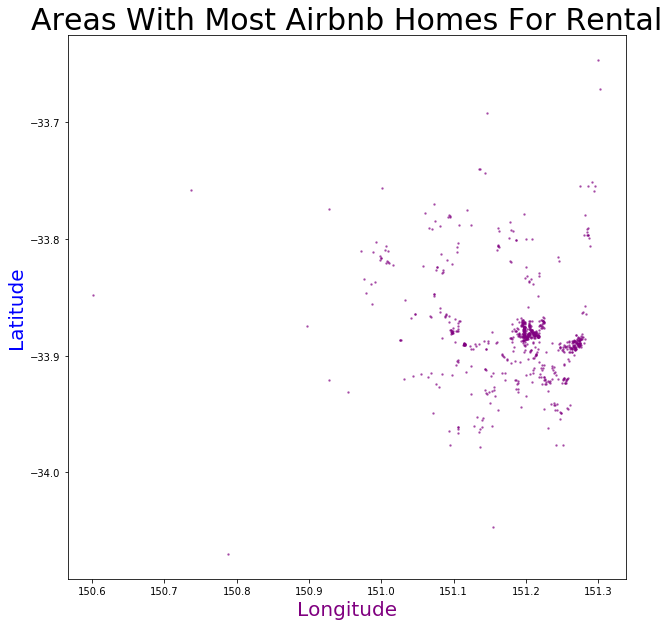

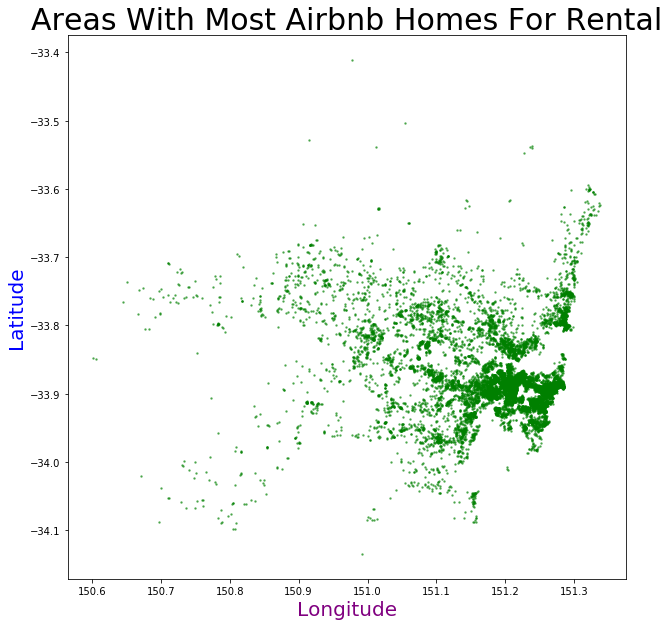

In [70]:
loc1 = data[entire]
loc2 = data[shared]
loc3 = data[privateapt]

figure(figsize=(10,10))
plot((loc1['longitude']), loc1['latitude'], '.',color = 'red', ms=3, alpha=.5)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'black',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.show()

figure(figsize=(10,10))
plot((loc2['longitude']), loc2['latitude'], '.',color = 'purple', ms=3, alpha=.5)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'black',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.show()

figure(figsize=(10,10))
plot((loc3['longitude']), loc3['latitude'], '.',color = 'green', ms=3, alpha=.5)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'black',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.show()

# All Room Types In A Plotted Map

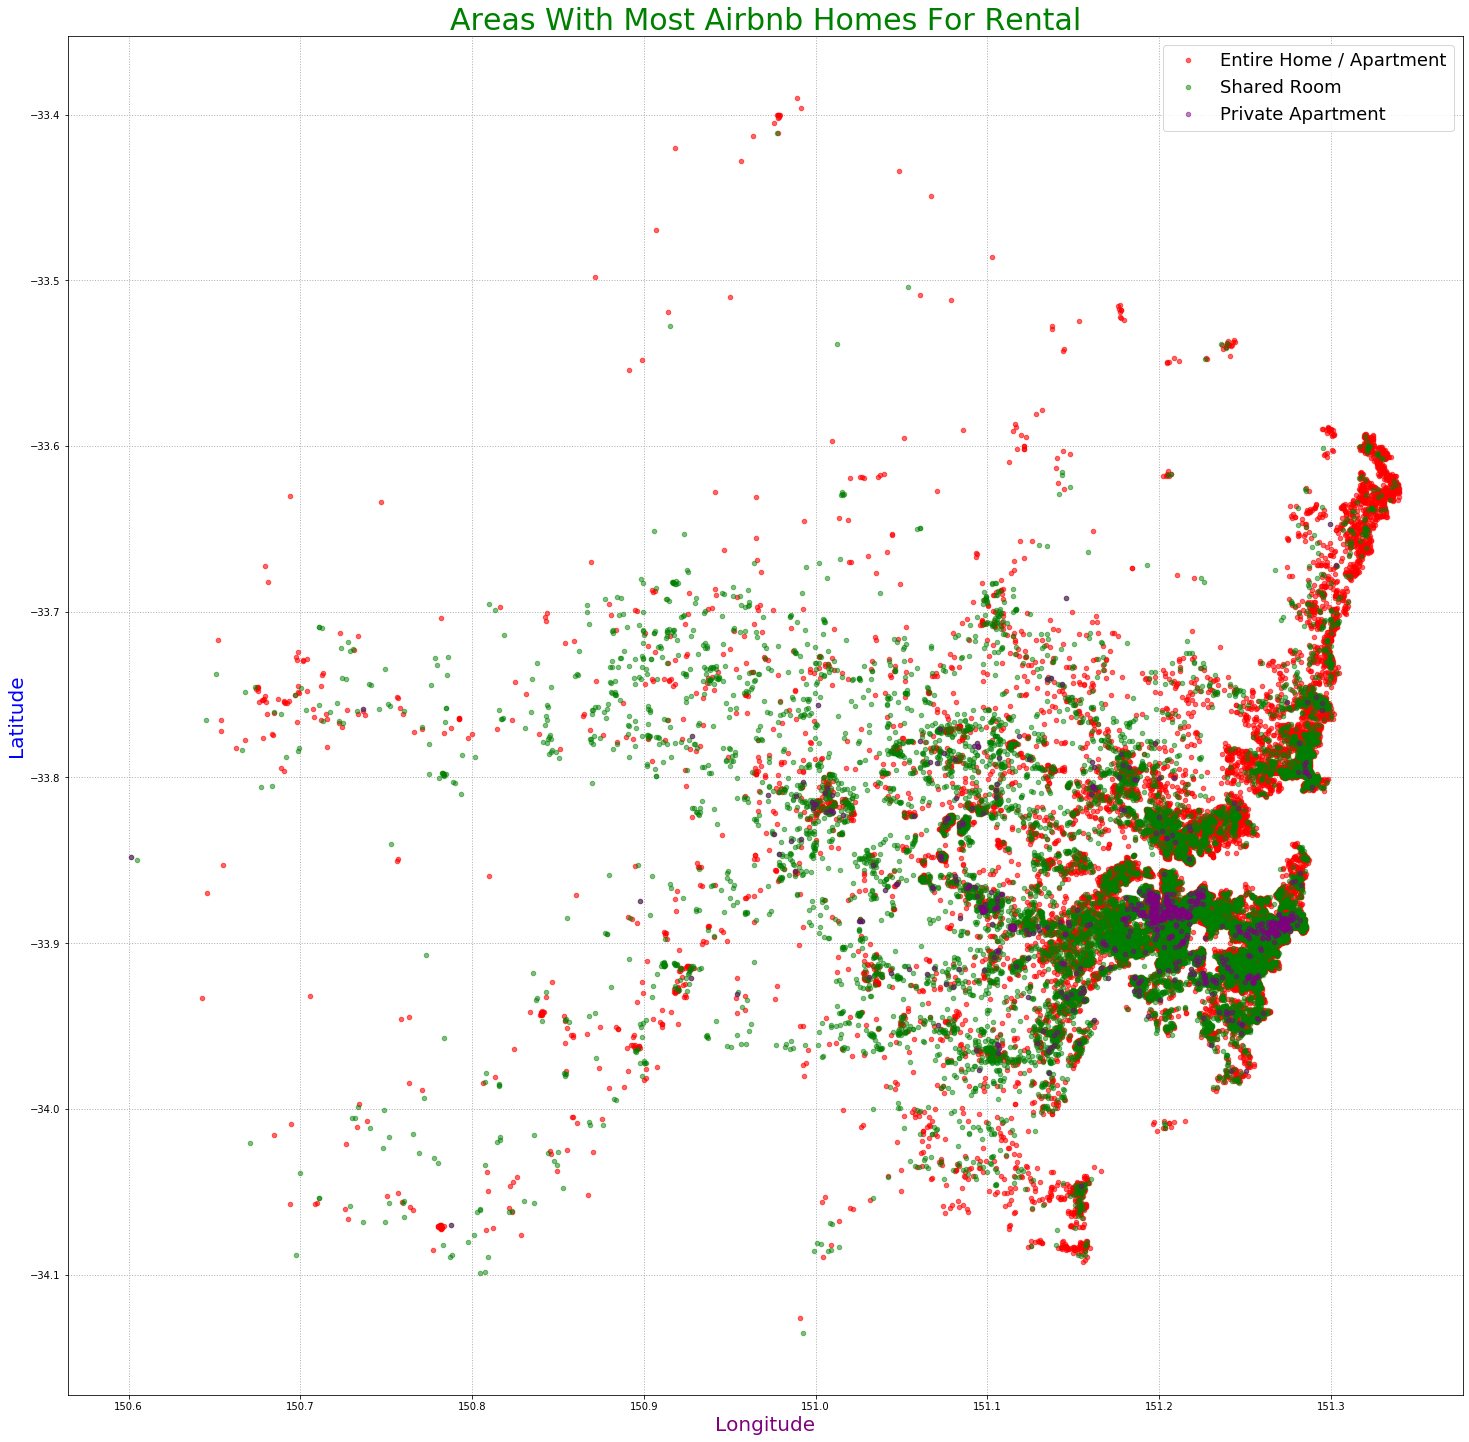

In [22]:
loc1 = data[entire]
loc2 = data[shared]
loc3 = data[privateapt]
mapimg = geopandas.GeoDataFrame.from_file('NSW_LOCALITY_POLYGON_shp.shp')

figure(figsize=(25,25))
plot((loc1['longitude']), loc1['latitude'], '.',color = 'red', ms=9, alpha=.6, label = 'Entire Home / Apartment')
plot((loc3['longitude']), loc3['latitude'], '.',color = 'green', ms=9, alpha=.5, label = 'Shared Room')
plot((loc2['longitude']), loc2['latitude'], '.',color = 'purple', ms=9, alpha=.5, label = 'Private Apartment')
plt.legend(fontsize=18)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'green',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.grid(linestyle=':', linewidth=1)
plt.show()


# Mapping Together The Regions

After completing the map, let's make these details more visualizing by adding a few unique and harder features to imply for this type of category of dataset.

In [42]:
burbs = geopandas.GeoDataFrame.from_file('NSW_LOCALITY_POLYGON_shp.shp')
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)
burbs.tail(2)

,LC_PLY_PID,DT_CREATE,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
4590,29138,2018-09-20,NSW2318,2012-02-04,LEETS VALE,G,None,1,"POLYGON ((150.94353356067 -33.40469527166, 150..."
4591,22443,2014-05-22,NSW3983,2014-08-02,TUCKI TUCKI,G,None,1,"POLYGON ((153.340672484218 -28.9010299630706, ..."


In [43]:
town1 = burbs.iloc[0]

In [44]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

In [45]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.geometry.distance(right_here)

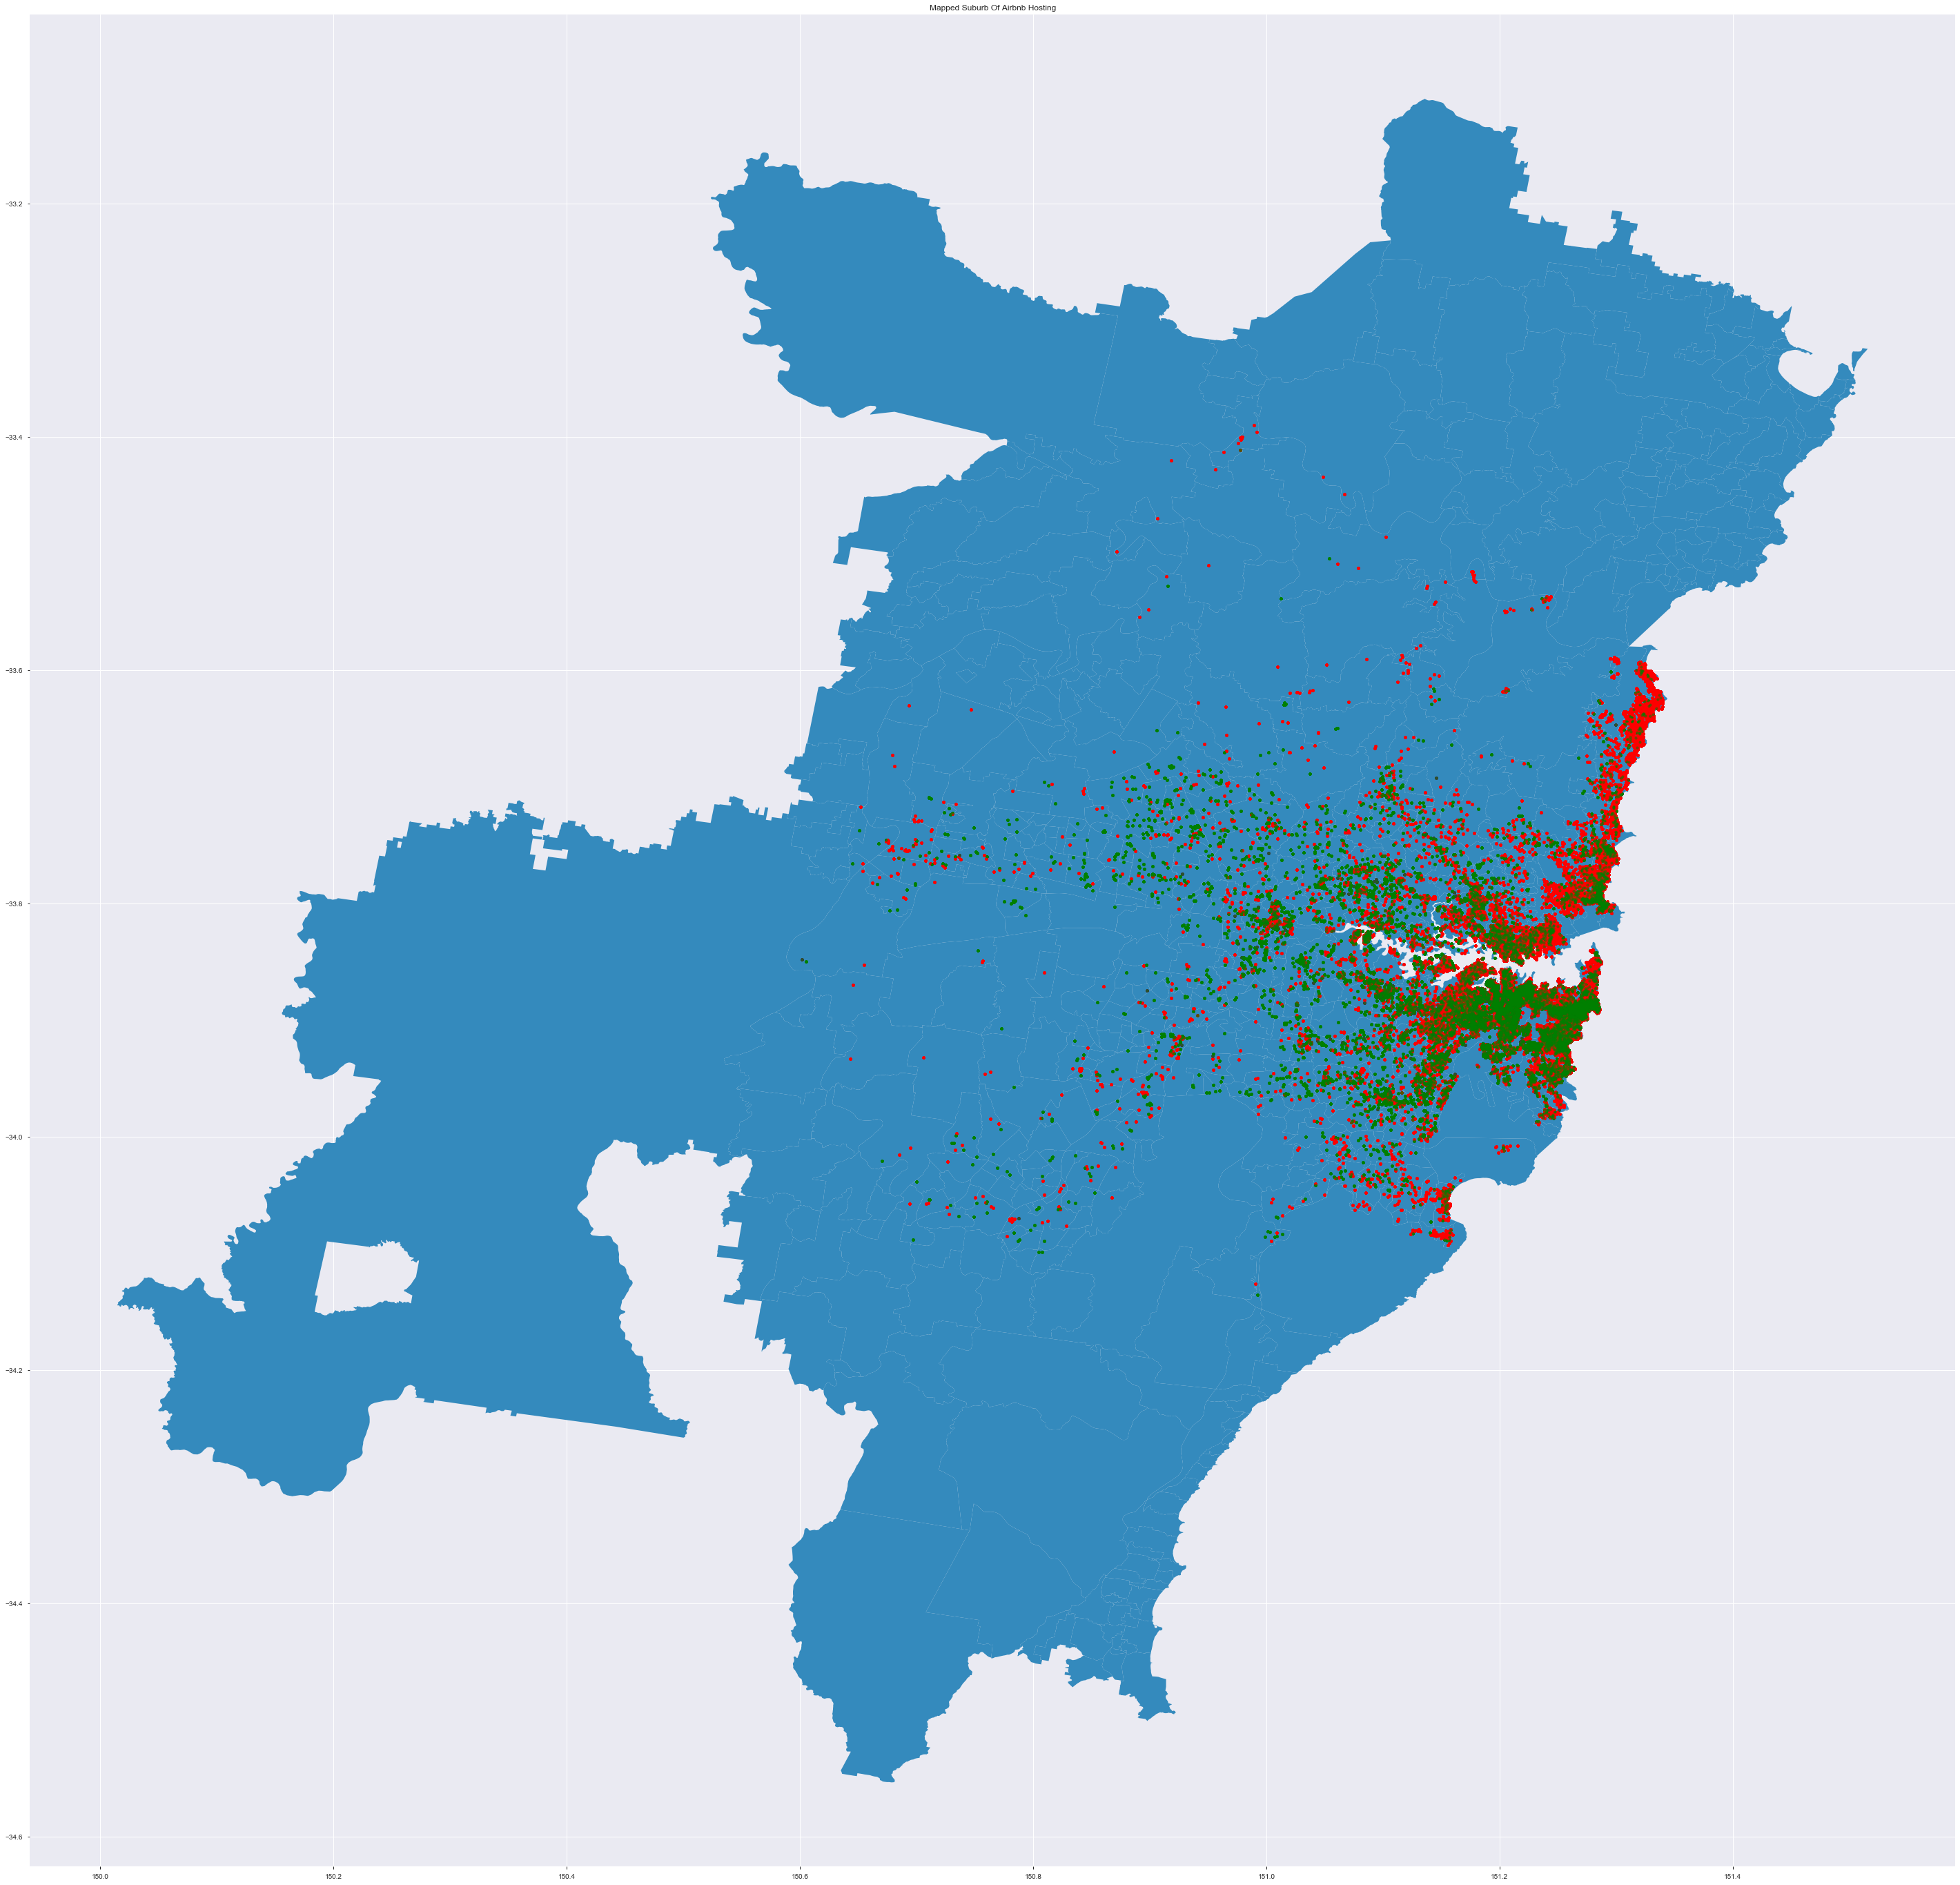

In [48]:
really_close_burbs = burbs[burbs.distance_from_UNSW<0.65]
really_close_burbs.plot()

for idx, row in really_close_burbs.iterrows():
    plot((loc1['longitude']), loc1['latitude'], '.',color = 'red', ms=8, alpha=.5, label = 'Entire Home / Apartment')
    plot((loc2['longitude']), loc2['latitude'], '.',color = 'purple', ms=8, alpha=.5, label = 'Private Apartment')
    plot((loc3['longitude']), loc3['latitude'], '.',color = 'green', ms=8, alpha=.5, label = 'Shared Room')
    plt.grid(linestyle=':', linewidth=1)
plt.title("Mapped Suburb Of Airbnb Hosting");

In [49]:
print(right_here)
in_this_burb = None
for _, row in really_close_burbs.iterrows():
    if right_here.within(row.geometry):
        in_this_burb = row
        
in_this_burb

POINT (151.2299732 -33.9178754)


LC_PLY_PID                                                        16612
DT_CREATE                                                    2012-02-16
LOC_PID                                                         NSW2123
NSW_LOCALI                                                   2012-05-04
NSW_LOCA_2                                                   KENSINGTON
NSW_LOCA_5                                                            G
NSW_LOCA_6                                                         None
NSW_LOCA_7                                                            1
geometry              POLYGON ((151.226736204561 -33.904512307867, 1...
centroid                   POINT (151.2206407346472 -33.91336830521539)
distance_from_UNSW                                                    0
Name: 1312, dtype: object

In [ ]:
in_this_burb = really_close_burbs[really_close_burbs.apply(lambda x: right_here.within(x.geometry) , axis=1)]
in_this_burb

# Other Stuff [ Testing ]

In [31]:
# data[shared].groupby("neighbourhood").mean()

In [32]:
# data[["neighbourhood", "price"]].head(10).plot(kind="barh")

In [33]:
# panda merge

In [34]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,65,2,185,2019-04-24,1.58,1,354
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14316,2,516,2019-06-29,4.73,2,19
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,470,5,2,2019-01-02,0.05,2,99
3,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,Sydney,-33.88045,151.21654,Private room,110,2,323,2019-05-23,3.60,3,336
4,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,Leichhardt,-33.85907,151.17275,Entire home/apt,450,7,16,2019-01-03,0.17,1,142


# More Other Graphs

In [35]:
data['price'] > 50
filtered_data = data['price'][data['price'] > 50]

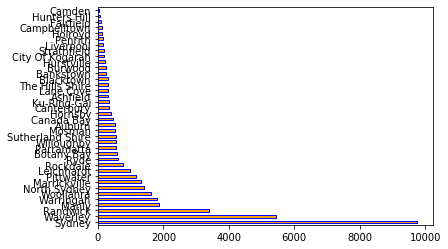

In [46]:
pandas.value_counts(data["neighbourhood"]).plot(kind='barh', color = 'orange',edgecolor='blue')

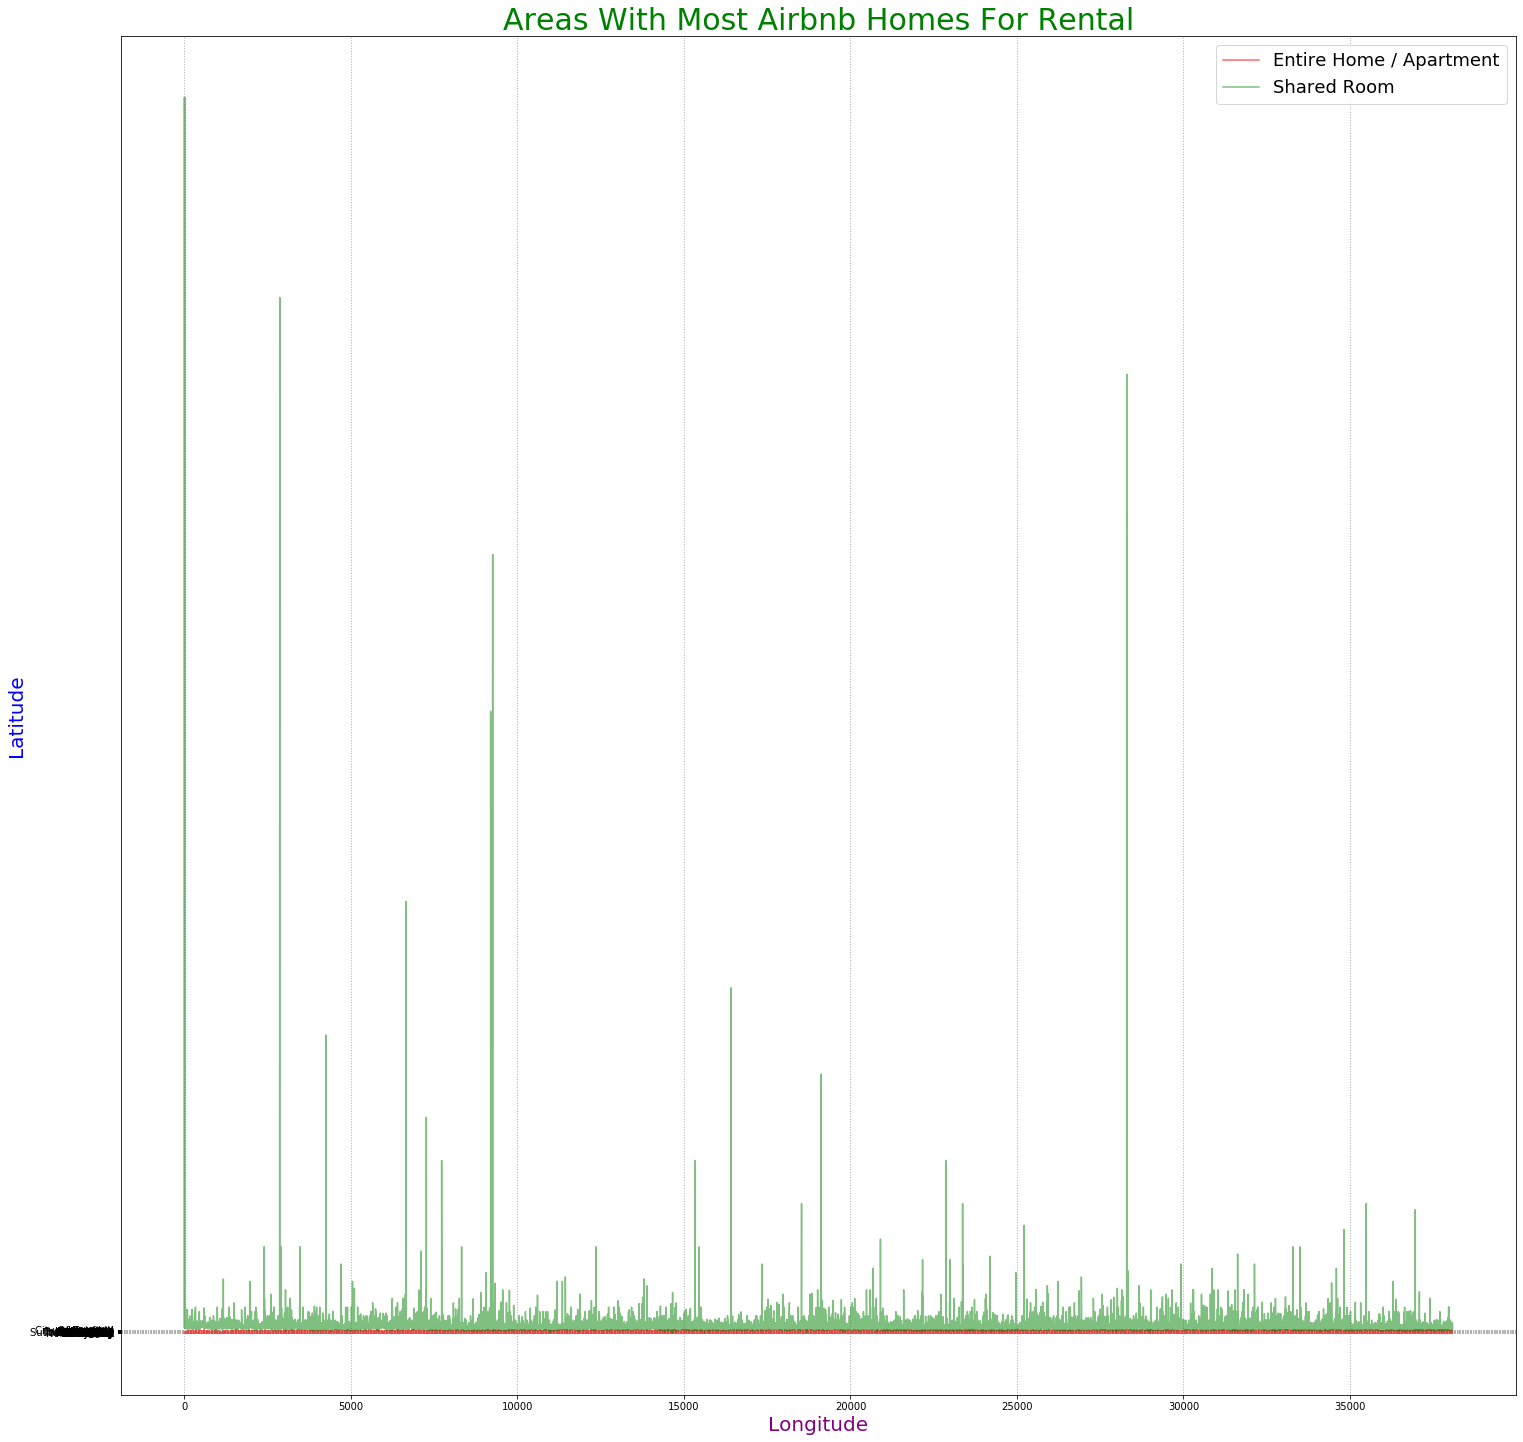

In [24]:
figure(figsize=(25,25))
plot(data['neighbourhood'], color = 'red', ms=9, alpha=.6, label = 'Entire Home / Apartment')
plot((loc3['price']),color = 'green', ms=9, alpha=.5, label = 'Shared Room')
plt.legend(fontsize=18)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'green',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.grid(linestyle=':', linewidth=1)
plt.show()